In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nm

In [2]:
df = pd.read_csv('sms-call-internet-mi-2013-11-05.csv', nrows= 20000)

In [3]:
df.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-05 00:00:00,1,0,0.1098,NaN,NaN,NaN,NaN
1,2013-11-05 00:00:00,1,33,NaN,NaN,NaN,NaN,0.0261
2,2013-11-05 00:00:00,1,39,1.5658,1.2285,0.2505,0.3503,56.4289
3,2013-11-05 00:00:00,1,44,0.0018,NaN,NaN,NaN,NaN
4,2013-11-05 00:00:00,1,46,NaN,NaN,NaN,NaN,0.0261


In [4]:
df.shape

(20000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     20000 non-null  object 
 1   CellID       20000 non-null  int64  
 2   countrycode  20000 non-null  int64  
 3   smsin        10996 non-null  float64
 4   smsout       5870 non-null   float64
 5   callin       5144 non-null   float64
 6   callout      7501 non-null   float64
 7   internet     10909 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.2+ MB


In [6]:
df.corr()

,CellID,countrycode,smsin,smsout,callin,callout,internet
CellID,1.000000,0.026314,0.241771,0.272846,0.305625,0.288300,0.182563
countrycode,0.026314,1.000000,-0.022419,-0.029817,-0.029917,-0.024279,-0.021607
smsin,0.241771,-0.022419,1.000000,0.853553,0.654177,0.605134,0.685118
smsout,0.272846,-0.029817,0.853553,1.000000,0.602943,0.555142,0.667968
callin,0.305625,-0.029917,0.654177,0.602943,1.000000,0.826269,0.886489
callout,0.288300,-0.024279,0.605134,0.555142,0.826269,1.000000,0.812652
internet,0.182563,-0.021607,0.685118,0.667968,0.886489,0.812652,1.000000


In [7]:
df.describe()

,CellID,countrycode,smsin,smsout,callin,callout,internet
count,20000.000000,20000.000000,10996.000000,5870.000000,5144.000000,7501.000000,10909.000000
mean,2491.359150,270.722600,1.803934,3.089774,0.843035,0.825997,81.153029
std,1314.071527,4112.526795,5.302641,8.470604,1.863956,1.901442,248.659518
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1395.000000,20.000000,0.102300,0.289600,0.077675,0.073200,0.053200
50%,2612.000000,39.000000,0.412950,0.755500,0.284900,0.229500,0.235800
75%,3669.000000,46.000000,1.276625,2.287425,0.783600,0.696200,63.556000
max,4506.000000,88239.000000,75.701800,161.733700,34.896600,28.016000,4953.494900


<AxesSubplot:>

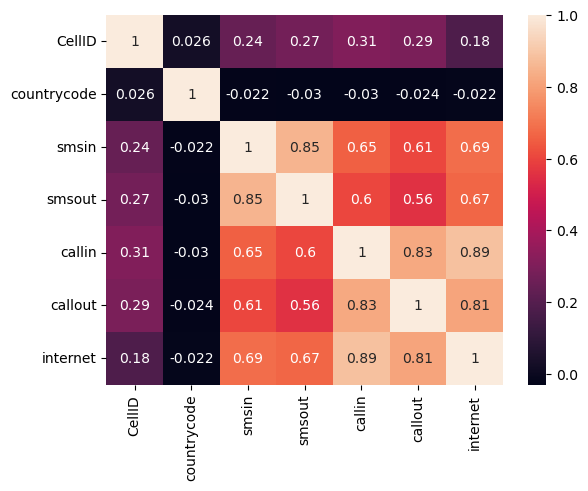

In [8]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='countrycode', ylabel='count'>

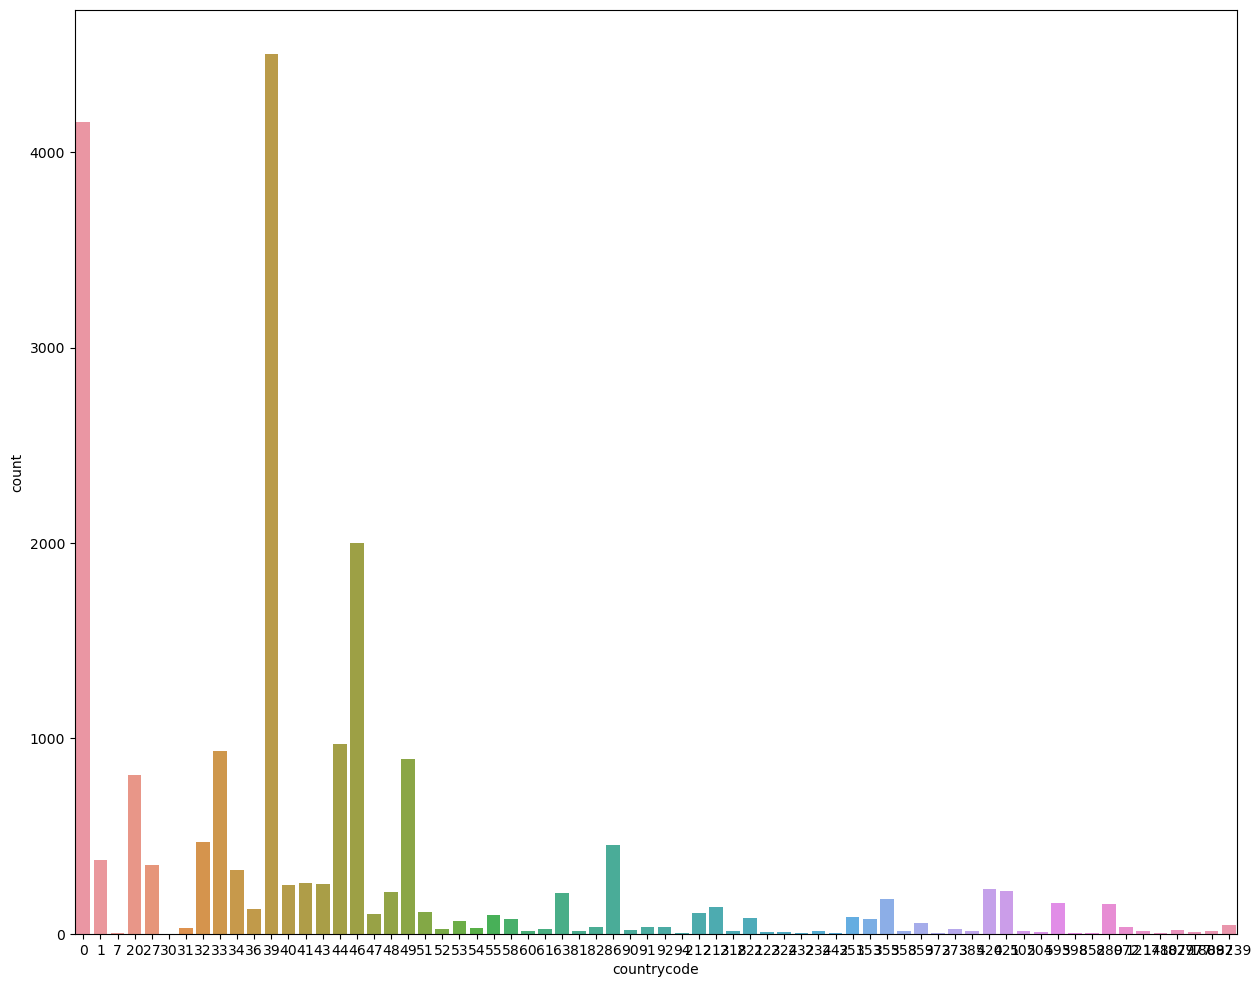

In [9]:
plt.figure(figsize=(15,12))
sns.countplot(data=df, x='countrycode')


In [10]:
df_new = df.dropna(axis=0,how='any')

In [11]:
df_new.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
2,2013-11-05 00:00:00,1,39,1.5658,1.2285,0.2505,0.3503,56.4289
7,2013-11-05 00:00:00,2,39,1.5933,1.2416,0.2495,0.3551,56.6035
12,2013-11-05 00:00:00,3,39,1.6227,1.2556,0.2484,0.3603,56.7894
16,2013-11-05 00:00:00,4,39,1.4860,1.1905,0.2535,0.3361,55.9231
21,2013-11-05 00:00:00,5,39,1.3694,1.0929,0.2287,0.2998,50.5446


In [12]:
X = df_new[['CellID','smsin','smsout','callin','internet']]
Y = df_new['callout']

# Now Trained

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size= .25, random_state= 225)

In [15]:
Xtrain.head()

,CellID,smsin,smsout,callin,internet
2190,615,0.2134,0.3612,0.0169,16.4880
4948,1384,1.1220,0.8553,0.5328,71.0584
12956,3274,1.4899,2.3327,0.5182,145.6124
7922,2098,0.3667,0.4213,0.1794,18.7217
8219,2158,0.0007,0.0017,0.0002,10.7326


In [16]:
Ytrain.head()

2190     0.0538
4948     1.2869
12956    0.9973
7922     0.2805
8219     0.0007
Name: callout, dtype: float64

In [17]:
X1 =X.copy()

In [18]:
X1.head()

,CellID,smsin,smsout,callin,internet
2,1,1.5658,1.2285,0.2505,56.4289
7,2,1.5933,1.2416,0.2495,56.6035
12,3,1.6227,1.2556,0.2484,56.7894
16,4,1.4860,1.1905,0.2535,55.9231
21,5,1.3694,1.0929,0.2287,50.5446


In [19]:
Y1 =Y.copy()

In [20]:
Y1.head()

2     0.3503
7     0.3551
12    0.3603
16    0.3361
21    0.2998
Name: callout, dtype: float64

# Apply in Model

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model1 = LinearRegression()

In [23]:
model1.fit(Xtrain,Ytrain)

LinearRegression()

In [24]:
predict1 = model1.predict(Xtest)

In [25]:
predict1

array([0.54232357, 0.34448978, 1.88230051, ..., 1.65720838, 1.74138182,
       0.31956737])

In [26]:
model1.score(Xtest,Ytest)

0.7219941299328139

In [27]:
# Import Metrics

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [29]:
# Metrics use in Linear Regression

In [30]:
mae1 = mean_absolute_error(Ytest,predict1)
mae1

0.5909371469023871

In [31]:
mse1 = mean_squared_error(Ytest,predict1)
mse1

1.598396844231396

In [32]:
rmse1=nm.sqrt(mse1)
rmse1

1.2642772022904614

In [33]:
lr_score = r2_score(Ytest,predict1)
lr_score

0.7219941299328139

# KNN Regression

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
model2 = KNeighborsRegressor()

In [36]:
model2.fit(Xtrain,Ytrain)

KNeighborsRegressor()

In [37]:
predict2 = model2.predict(Xtest)

In [38]:
model2.score(Xtest,Ytest)

0.7053011997631812

In [39]:
# Metrics use in KNN Regression

In [40]:
MAE2 = mean_absolute_error(Ytest,predict2)
MAE2

0.5859140823970037

In [41]:
MSE2 = mean_squared_error(Ytest,predict2)
MSE2

1.6943729719932583

In [42]:
RMSE2 = nm.sqrt(MSE2)
RMSE2

1.301680825699318

In [43]:
kn_score = r2_score(Ytest,predict2)
kn_score

0.7053011997631812

# SVR

In [44]:
from sklearn.svm import SVR

In [45]:
model3 = SVR()

In [46]:
model3.fit(Xtrain,Ytrain)

SVR()

In [47]:
predict3 = model3.predict(Xtest)

In [48]:
model3.score(Xtest,Ytest)

0.6547842253488608

In [49]:
# Metrics use in KNN Regression


In [50]:
MAE3 = mean_absolute_error(Ytest,predict3)
MAE3

0.596091197843963

In [51]:
MSE3 = mean_squared_error(Ytest,predict3)
MSE3

1.9848206969440076

In [52]:
svr_score =r2_score(Ytest,predict3)
svr_score

0.6547842253488608

In [53]:
RMSE3 = nm.sqrt(MSE3)
RMSE3

1.4088366466499966

# Experimental Result 

<AxesSubplot:xlabel='callout', ylabel='callin'>

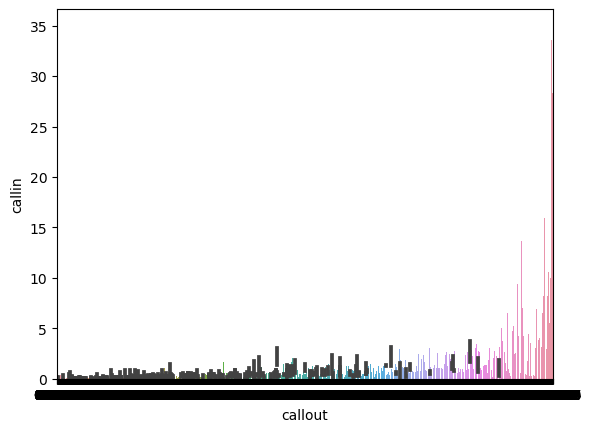

In [58]:
sns.barplot(x='callout',y='callin',data=df_new)

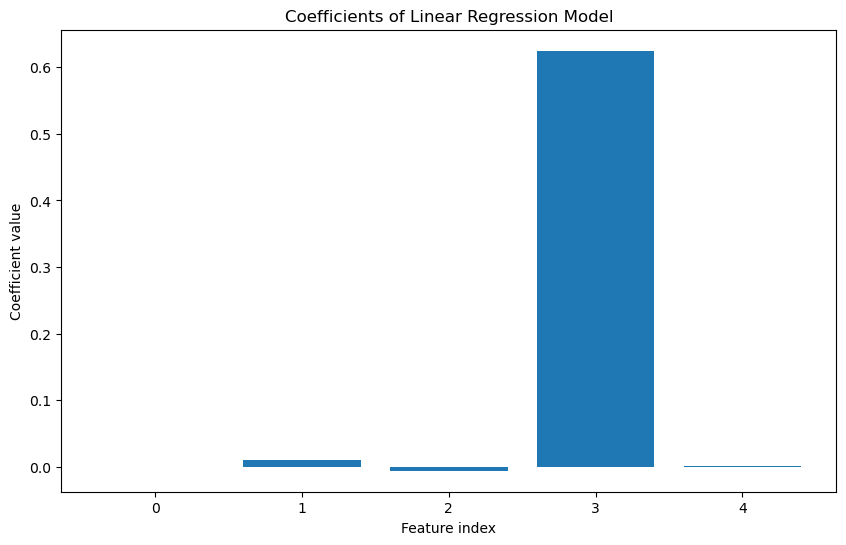

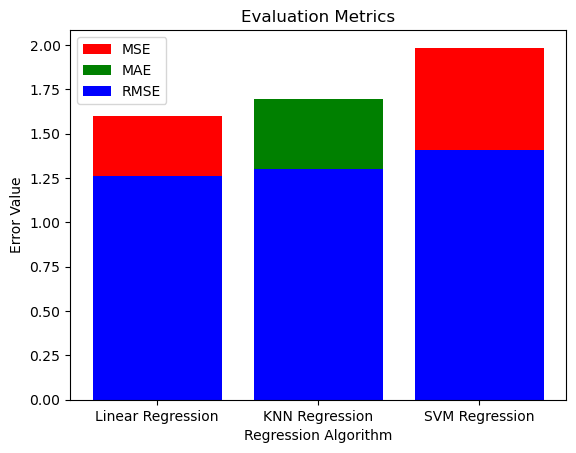

In [86]:
mse = [mse1, MSE2, MSE3]
mae = [mae1, MSE2, MAE3]
rmse = [rmse1, RMSE2, RMSE3]
labels = ['Linear Regression', 'KNN Regression', 'SVM Regression']

# Plot the bars
plt.bar(labels, mse, width=0.8, color='red', label='MSE')
plt.bar(labels, mae, width=0.8, color='green', label='MAE')
plt.bar(labels, rmse, width=0.8, color='blue', label='RMSE')

# Add chart title and axis labels
plt.title('Evaluation Metrics')
plt.xlabel('Regression Algorithm')
plt.ylabel('Error Value')

# Add legend
plt.legend()

# Show the plot
plt.show()